In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from neuralforecast.core import NeuralForecast, TimeSeriesDataset
from neuralforecast.models import NHITS, NBEATS, TimesNet

In [3]:
# pip install neuralforecast

In [4]:
# Load dataset
dxg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/DXG.csv')
dxg_dataset = dxg_dataset.assign(unique_id='DXG')

vhm_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/VHM.csv')
vhm_dataset = vhm_dataset.assign(unique_id='VHM')

qcg_dataset = pd.read_csv('/content/drive/MyDrive/Dataset BA/QCG.csv')
qcg_dataset = qcg_dataset.assign(unique_id='QCG')


In [5]:
# Rename columns DXG
dxg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
dxg_dataset['ds'] = pd.to_datetime(dxg_dataset['ds'], format='%d/%m/%Y')

dxg_dataset

,ds,y,Open,High,Low,Volume,Change %,unique_id
0,2024-03-01,"18,450.00","18,300.00","18,500.00","18,150.00",9.35M,1.10%,DXG
1,2024-02-29,"18,250.00","18,150.00","18,400.00","18,050.00",13.44M,1.11%,DXG
2,2024-02-28,"18,050.00","18,300.00","18,350.00","18,000.00",6.99M,-0.82%,DXG
3,2024-02-27,"18,200.00","18,000.00","18,300.00","17,800.00",11.25M,1.96%,DXG
4,2024-02-26,"17,850.00","18,100.00","18,150.00","17,650.00",9.10M,-1.65%,DXG
...,...,...,...,...,...,...,...,...
1247,2019-03-07,"17,092.00","17,912.40","17,912.40","17,092.00",3.84M,-3.29%,DXG
1248,2019-03-06,"17,673.20","17,502.20","17,741.50","17,365.50",1.64M,0.98%,DXG
1249,2019-03-05,"17,502.20","17,775.70","17,912.40","17,365.50",3.49M,-1.73%,DXG
1250,2019-03-04,"17,809.90","17,228.80","17,878.30","17,092.00",5.54M,4.41%,DXG


In [6]:
# Rename columns QCG
qcg_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
qcg_dataset['ds'] = pd.to_datetime(qcg_dataset['ds'], format='%d/%m/%Y')

qcg_dataset

,ds,y,Open,High,Low,Volume,Change %,unique_id
0,2024-03-01,"9,160.00","9,170.00","9,170.00","9,070.00",470.60K,0.33%,QCG
1,2024-02-29,"9,130.00","9,200.00","9,200.00","9,070.00",544.10K,-0.76%,QCG
2,2024-02-28,"9,200.00","9,200.00","9,210.00","9,040.00",582.60K,0.00%,QCG
3,2024-02-27,"9,200.00","8,920.00","9,300.00","8,870.00",800.30K,2.68%,QCG
4,2024-02-26,"8,960.00","8,990.00","9,000.00","8,510.00",444.10K,-0.33%,QCG
...,...,...,...,...,...,...,...,...
1247,2019-03-07,"5,370.00","5,250.00","5,370.00","5,200.00",736.85K,6.97%,QCG
1248,2019-03-06,"5,020.00","4,700.00","5,020.00","4,640.00",2.43M,6.81%,QCG
1249,2019-03-05,"4,700.00","4,700.00","4,750.00","4,620.00",1.04M,-1.88%,QCG
1250,2019-03-04,"4,790.00","4,700.00","4,790.00","4,600.00",1.20M,-0.21%,QCG


In [7]:
# Rename columns VHM
vhm_dataset.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
vhm_dataset['ds'] = pd.to_datetime(vhm_dataset['ds'], format='%d/%m/%Y')

vhm_dataset

,ds,y,Open,High,Low,Volume,Change %,unique_id
0,2024-03-01,"43,950","43,700","44,200","43,300",6.87M,1.27%,VHM
1,2024-02-29,"43,400","44,550","44,700","43,400",11.04M,-2.25%,VHM
2,2024-02-28,"44,400","44,450","44,900","44,000",6.28M,0.45%,VHM
3,2024-02-27,"44,200","43,750","44,200","43,300",7.16M,1.96%,VHM
4,2024-02-26,"43,350","43,450","43,850","43,100",7.00M,-0.23%,VHM
...,...,...,...,...,...,...,...,...
1247,2019-03-07,"69,173","69,173","71,654","69,097",1.70M,0.22%,VHM
1248,2019-03-06,"69,022","68,421","69,097","68,270",770.13K,0.88%,VHM
1249,2019-03-05,"68,421","69,323","69,849","68,045",1.50M,-2.36%,VHM
1250,2019-03-04,"70,075","69,173","70,300","67,368",1.18M,2.42%,VHM


In [8]:
# pip install neuralforecast

In [9]:
# Tiền xử lí dữ liệu

# Hàm chuyển đổi "Volume" từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))



In [10]:
# Apply function to DXG
dxg_dataset["Volume"] = dxg_dataset["Volume"].apply(convert_volume_to_number)
dxg_dataset["Change %"] = dxg_dataset["Change %"].apply(convert_change_to_number)
dxg_dataset['y'] = dxg_dataset['y'].apply(convert_str_to_number)
dxg_dataset['Open'] = dxg_dataset['Open'].apply(convert_str_to_number)
dxg_dataset['High'] = dxg_dataset['High'].apply(convert_str_to_number)
dxg_dataset['Low'] = dxg_dataset['Low'].apply(convert_str_to_number)

dxg_dataset.head(10)

,ds,y,Open,High,Low,Volume,Change %,unique_id
0,2024-03-01,18450.0,18300.0,18500.0,18150.0,9350000,0.0110,DXG
1,2024-02-29,18250.0,18150.0,18400.0,18050.0,13440000,0.0111,DXG
2,2024-02-28,18050.0,18300.0,18350.0,18000.0,6990000,-0.0082,DXG
3,2024-02-27,18200.0,18000.0,18300.0,17800.0,11250000,0.0196,DXG
4,2024-02-26,17850.0,18100.0,18150.0,17650.0,9100000,-0.0165,DXG
5,2024-02-23,18150.0,18500.0,18600.0,18000.0,14310000,-0.0189,DXG
6,2024-02-22,18500.0,18850.0,18850.0,18500.0,7650000,-0.0133,DXG
7,2024-02-21,18750.0,19050.0,19050.0,18700.0,7740000,-0.0106,DXG
8,2024-02-20,18950.0,18900.0,19100.0,18700.0,14050000,0.0080,DXG
9,2024-02-19,18800.0,19050.0,19050.0,18700.0,7340000,-0.0079,DXG


In [11]:
# Apply function to QCG
qcg_dataset["Volume"] = qcg_dataset["Volume"].apply(convert_volume_to_number)
qcg_dataset["Change %"] = qcg_dataset["Change %"].apply(convert_change_to_number)
qcg_dataset['y'] = qcg_dataset['y'].apply(convert_str_to_number)
qcg_dataset['Open'] = qcg_dataset['Open'].apply(convert_str_to_number)
qcg_dataset['High'] = qcg_dataset['High'].apply(convert_str_to_number)
qcg_dataset['Low'] = qcg_dataset['Low'].apply(convert_str_to_number)

qcg_dataset.head(10)

,ds,y,Open,High,Low,Volume,Change %,unique_id
0,2024-03-01,9160.0,9170.0,9170.0,9070.0,470600,0.0033,QCG
1,2024-02-29,9130.0,9200.0,9200.0,9070.0,544100,-0.0076,QCG
2,2024-02-28,9200.0,9200.0,9210.0,9040.0,582600,0.0000,QCG
3,2024-02-27,9200.0,8920.0,9300.0,8870.0,800300,0.0268,QCG
4,2024-02-26,8960.0,8990.0,9000.0,8510.0,444100,-0.0033,QCG
5,2024-02-23,8990.0,9180.0,9180.0,8980.0,688000,-0.0207,QCG
6,2024-02-22,9180.0,8800.0,9200.0,8770.0,1160000,0.0479,QCG
7,2024-02-21,8760.0,8800.0,8800.0,8690.0,228400,-0.0023,QCG
8,2024-02-20,8780.0,8800.0,8840.0,8710.0,421700,0.0080,QCG
9,2024-02-19,8710.0,8800.0,8800.0,8620.0,359900,-0.0114,QCG


In [12]:
# Apply function to VHM
vhm_dataset["Volume"] = vhm_dataset["Volume"].apply(convert_volume_to_number)
vhm_dataset["Change %"] = vhm_dataset["Change %"].apply(convert_change_to_number)
vhm_dataset['y'] = vhm_dataset['y'].apply(convert_str_to_number)
vhm_dataset['Open'] = vhm_dataset['Open'].apply(convert_str_to_number)
vhm_dataset['High'] = vhm_dataset['High'].apply(convert_str_to_number)
vhm_dataset['Low'] = vhm_dataset['Low'].apply(convert_str_to_number)

vhm_dataset.head(10)

,ds,y,Open,High,Low,Volume,Change %,unique_id
0,2024-03-01,43950.0,43700.0,44200.0,43300.0,6870000,0.0127,VHM
1,2024-02-29,43400.0,44550.0,44700.0,43400.0,11040000,-0.0225,VHM
2,2024-02-28,44400.0,44450.0,44900.0,44000.0,6280000,0.0045,VHM
3,2024-02-27,44200.0,43750.0,44200.0,43300.0,7160000,0.0196,VHM
4,2024-02-26,43350.0,43450.0,43850.0,43100.0,7000000,-0.0023,VHM
5,2024-02-23,43450.0,45000.0,45100.0,43250.0,11750000,-0.0301,VHM
6,2024-02-22,44800.0,45100.0,45450.0,44800.0,6810000,-0.0044,VHM
7,2024-02-21,45000.0,46100.0,46100.0,44800.0,8950000,-0.0249,VHM
8,2024-02-20,46150.0,46000.0,46700.0,45850.0,12930000,0.0132,VHM
9,2024-02-19,45550.0,43000.0,45650.0,42900.0,20160000,0.0667,VHM


In [13]:
# Define the sizes for training, testing, and validation sets
dxg_total_size = len(dxg_dataset)
dxg_train_size = int(dxg_total_size * 0.8)
dxg_test_size = int(dxg_total_size * 0.15)
dxg_val_size = dxg_total_size - dxg_train_size - dxg_test_size

vhm_total_size = len(vhm_dataset)
vhm_train_size = int(vhm_total_size * 0.8)
vhm_test_size = int(vhm_total_size * 0.15)
vhm_val_size = vhm_total_size - vhm_train_size - vhm_test_size

qcg_total_size = len(qcg_dataset)
qcg_train_size = int(qcg_total_size * 0.8)
qcg_test_size = int(qcg_total_size * 0.15)
qcg_val_size = qcg_total_size - qcg_train_size - qcg_test_size

# Split the dataset
dxg_train_data = dxg_dataset.iloc[:dxg_train_size]
dxg_test_data = dxg_dataset.iloc[dxg_train_size:dxg_train_size+dxg_test_size]
dxg_val_data = dxg_dataset.iloc[dxg_train_size+dxg_test_size:]

vhm_train_data = vhm_dataset.iloc[:vhm_train_size]
vhm_test_data = vhm_dataset.iloc[vhm_train_size:vhm_train_size+vhm_test_size]
vhm_val_data = vhm_dataset.iloc[vhm_train_size+vhm_test_size:]

qcg_train_data = qcg_dataset.iloc[:qcg_train_size]
qcg_test_data = qcg_dataset.iloc[qcg_train_size:qcg_train_size+qcg_test_size]
qcg_val_data = qcg_dataset.iloc[qcg_train_size+qcg_test_size:]

# Optionally, reset index for each subset
dxg_train_data.reset_index(drop=True, inplace=True)
dxg_test_data.reset_index(drop=True, inplace=True)
dxg_val_data.reset_index(drop=True, inplace=True)

vhm_train_data.reset_index(drop=True, inplace=True)
vhm_test_data.reset_index(drop=True, inplace=True)
vhm_val_data.reset_index(drop=True, inplace=True)

qcg_train_data.reset_index(drop=True, inplace=True)
qcg_test_data.reset_index(drop=True, inplace=True)
qcg_val_data.reset_index(drop=True, inplace=True)


# print(f"Training set size: {len(dxg_train_data)}")
# print(f"Testing set size: {len(dxg_test_data)}")
# print(f"Validation set size: {len(dxg_val_data)}")


In [14]:
from neuralforecast.losses.pytorch import DistributionLoss

def create_timesnet_model(h):
    model = TimesNet(
        h=h,
        input_size=24,
        hidden_size=16,
        conv_hidden_size=32,
        loss=DistributionLoss(distribution='Normal', level=[80, 90]),
        scaler_type='standard',
        learning_rate=1e-3,
        max_steps=1,
        val_check_steps=50,
        early_stop_patience_steps=2
    )
    return model

In [15]:
# Define val, test model for DXG
dxg_model_test = create_timesnet_model(h=dxg_test_size)
dxg_model_val = create_timesnet_model(h=dxg_val_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [16]:
# Define val, test model for VHM
vhm_model_test = create_timesnet_model(h=vhm_test_size)
vhm_model_val = create_timesnet_model(h=vhm_val_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [17]:
# Define val, test model for QCG
qcg_model_test = create_timesnet_model(h=qcg_test_size)
qcg_model_val = create_timesnet_model(h=qcg_val_size)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [18]:
#Define Neural model for DXG
dxg_nf_test = NeuralForecast(
    models=[dxg_model_test], freq="D")
dxg_nf_val = NeuralForecast(
    models=[dxg_model_val], freq="D")

#Define Neural model for DXG
vhm_nf_test = NeuralForecast(
    models=[vhm_model_test], freq="D")
vhm_nf_val = NeuralForecast(
    models=[vhm_model_val], freq="D")

#Define Neural model for DXG
qcg_nf_test = NeuralForecast(
    models=[qcg_model_test], freq="D")
qcg_nf_val = NeuralForecast(
    models=[qcg_model_val], freq="D")

In [19]:
#Fit model DXG
dxg_nf_test.fit(dxg_train_data, val_size=dxg_test_size, id_col='unique_id', time_col="ds", target_col='y')
dxg_nf_val.fit(dxg_train_data, val_size=dxg_val_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params
----------------------------------------------------
0 | loss           | DistributionLoss | 5     
1 | padder_train   | ConstantPad1d    | 0     
2 | scaler         | TemporalNorm     | 0     
3 | model          | ModuleList       | 586 K 
4 | enc_embedding  |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params
----------------------------------------------------
0 | loss           | DistributionLoss | 5     
1 | padder_train   | ConstantPad1d    | 0     
2 | scaler         | Temp

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [20]:
#Fit model VHM
vhm_nf_test.fit(vhm_train_data, val_size=vhm_test_size, id_col='unique_id', time_col="ds", target_col='y')
vhm_nf_val.fit(vhm_train_data, val_size=vhm_val_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params
----------------------------------------------------
0 | loss           | DistributionLoss | 5     
1 | padder_train   | ConstantPad1d    | 0     
2 | scaler         | TemporalNorm     | 0     
3 | model          | ModuleList       | 586 K 
4 | enc_embedding  |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params
----------------------------------------------------
0 | loss           | DistributionLoss | 5     
1 | padder_train   | ConstantPad1d    | 0     
2 | scaler         | Temp

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [21]:
#Fit model QCG
qcg_nf_test.fit(qcg_train_data, val_size=qcg_test_size, id_col='unique_id', time_col="ds", target_col='y')
qcg_nf_val.fit(qcg_train_data, val_size=qcg_val_size, id_col='unique_id', time_col="ds", target_col='y')

/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params
----------------------------------------------------
0 | loss           | DistributionLoss | 5     
1 | padder_train   | ConstantPad1d    | 0     
2 | scaler         | TemporalNorm     | 0     
3 | model          | ModuleList       | 586 K 
4 | enc_embedding  |

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:208: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type             | Params
----------------------------------------------------
0 | loss           | DistributionLoss | 5     
1 | padder_train   | ConstantPad1d    | 0     
2 | scaler         | Temp

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [22]:
#Predict DXG
dxg_pred_test = dxg_nf_test.predict(dxg_test_data)
dxg_pred_val = dxg_nf_val.predict(dxg_val_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [23]:
#Predict VHM
vhm_pred_test = vhm_nf_test.predict(vhm_test_data)
vhm_pred_val = vhm_nf_val.predict(vhm_val_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [24]:
#Predict DXG
qcg_pred_test = qcg_nf_test.predict(qcg_test_data)
qcg_pred_val = qcg_nf_val.predict(qcg_val_data)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:`Trainer(val_check_interval=1)` was configured so validation will run after every batch.


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [25]:
# print(dxg_pred_test)
# print(dxg_pred_val)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# Hàm tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

In [27]:
# Tính toán RMSE, MAE và MAPE trên tập test của DXG
dxg_test_score_rmse = np.sqrt(mean_squared_error(dxg_test_data['y'], dxg_pred_test['TimesNet']))
dxg_test_score_mape = mean_absolute_percentage_error(dxg_test_data['y'], dxg_pred_test['TimesNet']) * 100
dxg_test_score_mda = calculate_mda(dxg_test_data['y'], dxg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', dxg_test_score_rmse)
print('MAPE trên tập test của DXG là:', dxg_test_score_mape, '%')
print('MDA trên tập test của DXG là:', dxg_test_score_mda, '%')

RMSE trên tập test của DXG là: 2398.967536034703
MAPE trên tập test của DXG là: 16.050729729401 %
MDA trên tập test của DXG là: 47.31182795698925 %


In [28]:
# Tính toán RMSE, MAE và MAPE trên tập test của VHM
vhm_test_score_rmse = np.sqrt(mean_squared_error(vhm_test_data['y'], vhm_pred_test['TimesNet']))
vhm_test_score_mape = mean_absolute_percentage_error(vhm_test_data['y'], vhm_pred_test['TimesNet']) * 100
vhm_test_score_mda = calculate_mda(vhm_test_data['y'], vhm_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', vhm_test_score_rmse)
print('MAPE trên tập test của DXG là:', vhm_test_score_mape, '%')
print('MDA trên tập test của DXG là:', vhm_test_score_mda, '%')

RMSE trên tập test của DXG là: 3700.2890687320196
MAPE trên tập test của DXG là: 4.213214497307075 %
MDA trên tập test của DXG là: 43.01075268817204 %


In [29]:
# Tính toán RMSE, MAE và MAPE trên tập test của QCG
qcg_test_score_rmse = np.sqrt(mean_squared_error(qcg_test_data['y'], qcg_pred_test['TimesNet']))
qcg_test_score_mape = mean_absolute_percentage_error(qcg_test_data['y'], qcg_pred_test['TimesNet']) * 100
qcg_test_score_mda = calculate_mda(qcg_test_data['y'], qcg_pred_test['TimesNet'])

print('RMSE trên tập test của DXG là:', qcg_test_score_rmse)
print('MAPE trên tập test của DXG là:', qcg_test_score_mape, '%')
print('MDA trên tập test của DXG là:', qcg_test_score_mda, '%')

RMSE trên tập test của DXG là: 759.1877635332525
MAPE trên tập test của DXG là: 14.82935069877264 %
MDA trên tập test của DXG là: 43.01075268817204 %


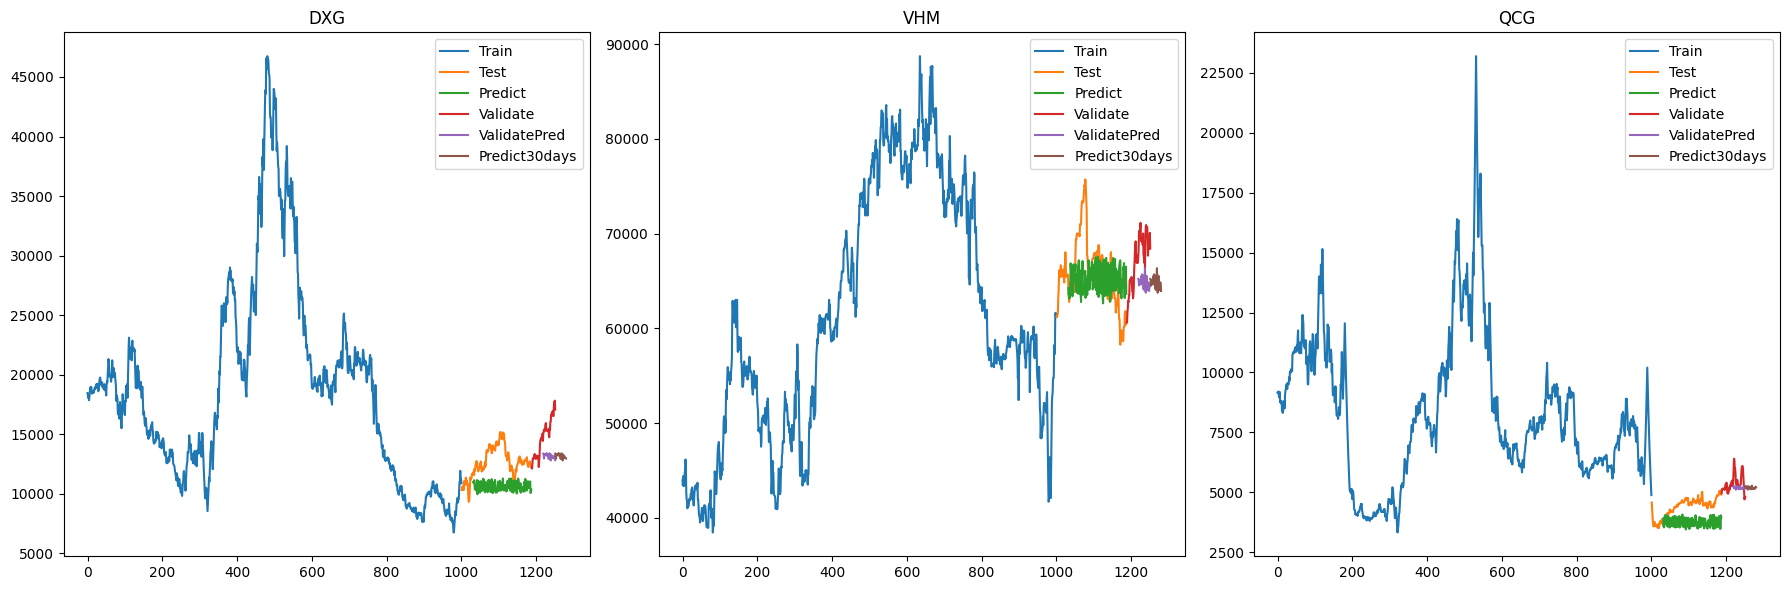

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# DXG
dxg_train_data_index = pd.RangeIndex(start=0, stop=dxg_train_size, step=1)
axs[0].plot(dxg_train_data['y'], label='Train')

dxg_test_data_index = pd.RangeIndex(start=dxg_train_size, stop=dxg_train_size + dxg_test_size, step=1)
axs[0].plot(dxg_test_data_index, dxg_test_data['y'], label='Test')

dxg_test_data_index = pd.RangeIndex(start=dxg_train_size + 31, stop=dxg_train_size + dxg_test_size, step=1)
axs[0].plot(dxg_test_data_index, dxg_pred_test['TimesNet'][:156], label='Predict')

dxg_val_data_index = pd.RangeIndex(start=dxg_train_size + dxg_test_size, stop=dxg_train_size + dxg_test_size + dxg_val_size, step=1)
axs[0].plot(dxg_val_data_index, dxg_val_data['y'], label='Validate')

dxg_val_data_index = pd.RangeIndex(start=dxg_train_size + dxg_test_size + 31, stop=dxg_train_size + dxg_test_size + dxg_val_size, step=1)
axs[0].plot(dxg_val_data_index, dxg_pred_val['TimesNet'][:33], label='ValidatePred')

dxg_predict_data_index = pd.RangeIndex(start=len(dxg_dataset) - 1, stop=len(dxg_dataset) + 29, step=1)
axs[0].plot(dxg_predict_data_index, dxg_pred_val['TimesNet'][:30], label='Predict30days')

axs[0].legend()
axs[0].set_title('DXG')

# VHM
vhm_train_data_index = pd.RangeIndex(start=0, stop=vhm_train_size, step=1)
axs[1].plot(vhm_train_data['y'], label='Train')

vhm_test_data_index = pd.RangeIndex(start=vhm_train_size, stop=vhm_train_size + vhm_test_size, step=1)
axs[1].plot(vhm_test_data_index, vhm_test_data['y'], label='Test')

vhm_test_data_index = pd.RangeIndex(start=vhm_train_size + 31, stop=vhm_train_size + vhm_test_size, step=1)
axs[1].plot(vhm_test_data_index, vhm_pred_test['TimesNet'][:156], label='Predict')

vhm_val_data_index = pd.RangeIndex(start=vhm_train_size + vhm_test_size, stop=vhm_train_size + vhm_test_size + vhm_val_size, step=1)
axs[1].plot(vhm_val_data_index, vhm_val_data['y'], label='Validate')

vhm_val_data_index = pd.RangeIndex(start=vhm_train_size + vhm_test_size + 31, stop=vhm_train_size + vhm_test_size + vhm_val_size, step=1)
axs[1].plot(vhm_val_data_index, vhm_pred_val['TimesNet'][:33], label='ValidatePred')

vhm_predict_data_index = pd.RangeIndex(start=len(vhm_dataset) - 1, stop=len(vhm_dataset) + 29, step=1)
axs[1].plot(vhm_predict_data_index, vhm_pred_val['TimesNet'][:30], label='Predict30days')

axs[1].legend()
axs[1].set_title('VHM')

# QCG
qcg_train_data_index = pd.RangeIndex(start=0, stop=qcg_train_size, step=1)
axs[2].plot(qcg_train_data['y'], label='Train')

qcg_test_data_index = pd.RangeIndex(start=qcg_train_size, stop=qcg_train_size + qcg_test_size, step=1)
axs[2].plot(qcg_test_data_index, qcg_test_data['y'], label='Test')

qcg_test_data_index = pd.RangeIndex(start=qcg_train_size + 31, stop=qcg_train_size + qcg_test_size, step=1)
axs[2].plot(qcg_test_data_index, qcg_pred_test['TimesNet'][:156], label='Predict')

qcg_val_data_index = pd.RangeIndex(start=qcg_train_size + qcg_test_size, stop=qcg_train_size + qcg_test_size + qcg_val_size, step=1)
axs[2].plot(qcg_val_data_index, qcg_val_data['y'], label='Validate')

qcg_val_data_index = pd.RangeIndex(start=qcg_train_size + qcg_test_size + 31, stop=qcg_train_size + qcg_test_size + qcg_val_size, step=1)
axs[2].plot(qcg_val_data_index, qcg_pred_val['TimesNet'][:33], label='ValidatePred')

qcg_predict_data_index = pd.RangeIndex(start=len(qcg_dataset) - 1, stop=len(qcg_dataset) + 29, step=1)
axs[2].plot(qcg_predict_data_index, qcg_pred_val['TimesNet'][:30], label='Predict30days')

axs[2].legend()
axs[2].set_title('QCG')

plt.tight_layout()
plt.show()